In [48]:
%matplotlib notebook

In [49]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
logs = glob.glob('log/PLA/*.csv')
logs.sort()

interaction_data = {}
for file in logs:
    print(file)
    interaction_data[file] = pd.read_csv(file, header=None)
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\r\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    interaction_data[file][1] = interaction_data[file][2].apply(convert_str_to_matrix)
    interaction_data[file][2] = interaction_data[file][2].apply(convert_str_to_matrix)
    print(interaction_data[file].shape)

log/PLA\2018-09-17.csv
(3066, 4)
log/PLA\2018-09-18.csv
(1494, 4)
log/PLA\2018-09-19.csv
(2308, 4)
log/PLA\2018-09-20.csv
(1596, 4)
log/PLA\2018-09-21.csv
(1511, 4)
log/PLA\2018-09-24.csv
(1000, 4)
log/PLA\2018-09-25.csv
(1661, 4)
log/PLA\2018-09-26.csv
(1564, 4)
log/PLA\2018-09-27.csv
(1604, 4)
log/PLA\2018-09-28.csv
(1530, 4)
log/PLA\2018-10-02.csv
(825, 4)
log/PLA\2018-10-03.csv
(1426, 4)
log/PLA\2018-10-05.csv
(1468, 4)


In [69]:
interaction_data_all = {}
interaction_data_all['data'] = pd.DataFrame()
interaction_data_all['separate_line'] = []

for key in interaction_data.keys():
    interaction_data_all['data'] = pd.concat([interaction_data_all['data'], interaction_data[key]])
    interaction_data_all['separate_line'].append(len(interaction_data[key]))
for i in range(1,len(interaction_data_all['separate_line'])):
#     print("{}".format(i))
    interaction_data_all['separate_line'][i] = interaction_data_all['separate_line'][i] + interaction_data_all['separate_line'][i-1]
interaction_data_all['separate_line']

[3066,
 4560,
 6868,
 8464,
 9975,
 10975,
 12636,
 14200,
 15804,
 17334,
 18159,
 19585,
 21053]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


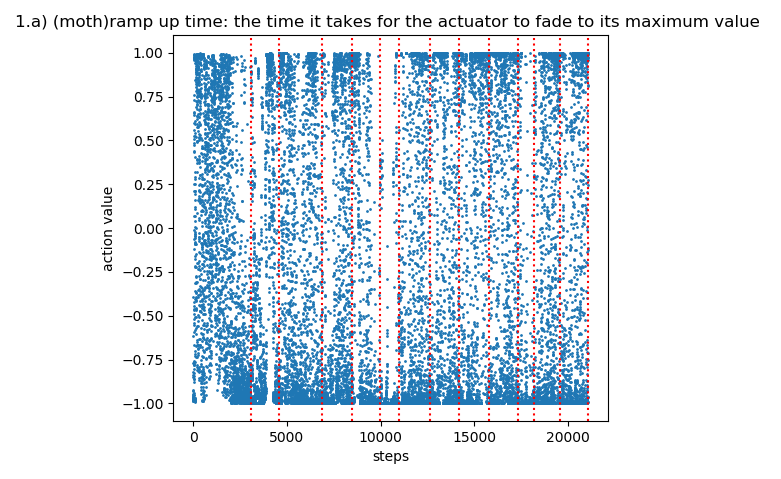

<IPython.core.display.Javascript object>


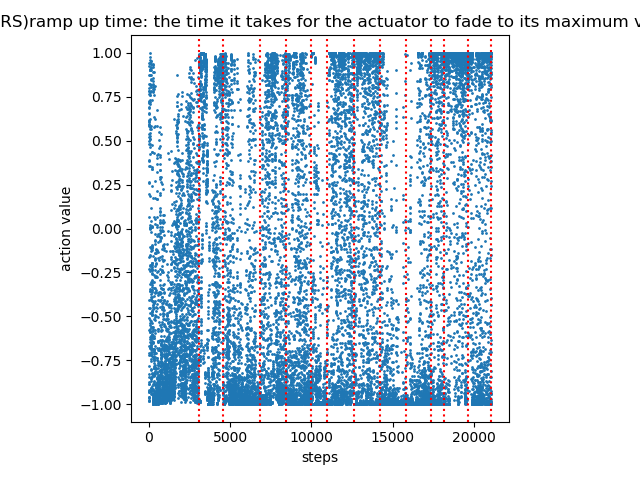

<IPython.core.display.Javascript object>


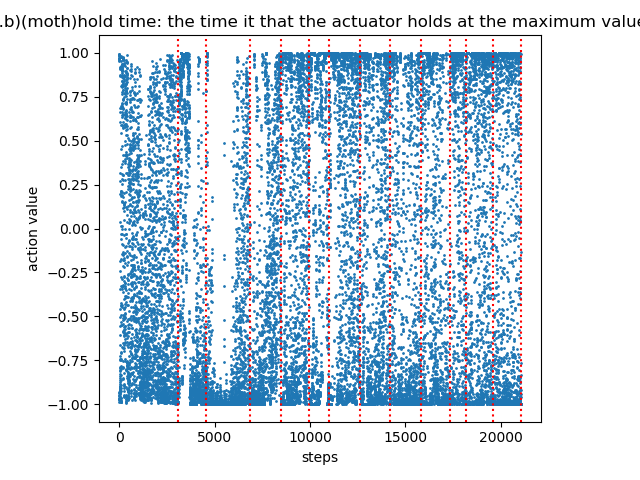

<IPython.core.display.Javascript object>


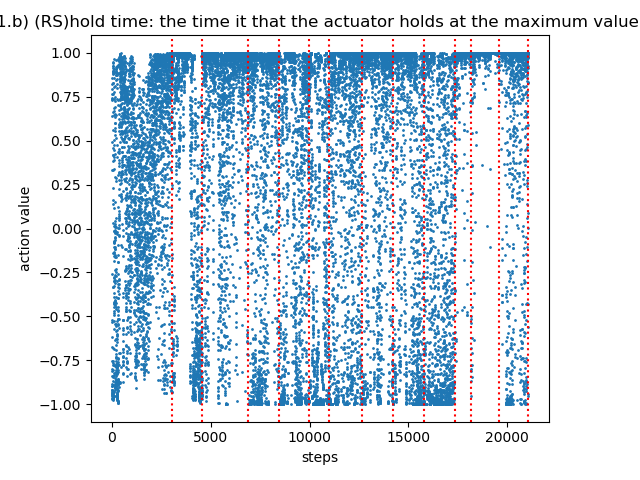

<IPython.core.display.Javascript object>


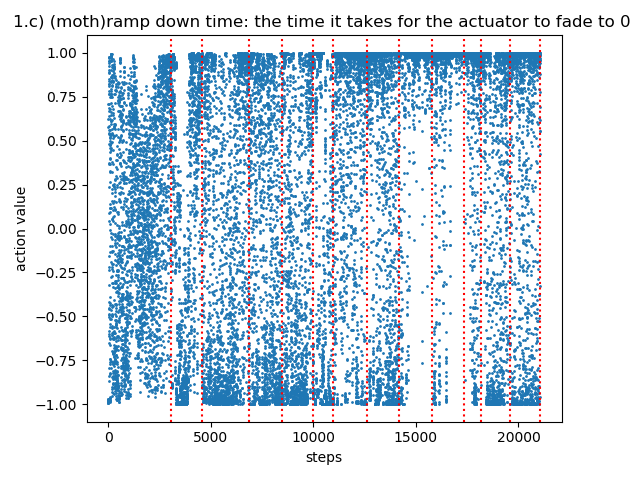

<IPython.core.display.Javascript object>


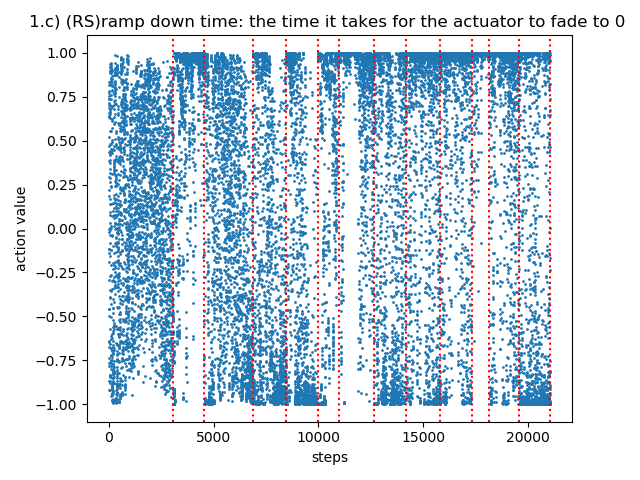

<IPython.core.display.Javascript object>


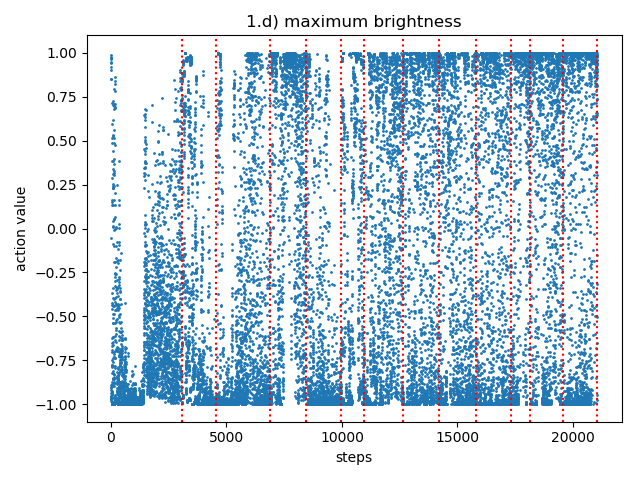

<IPython.core.display.Javascript object>


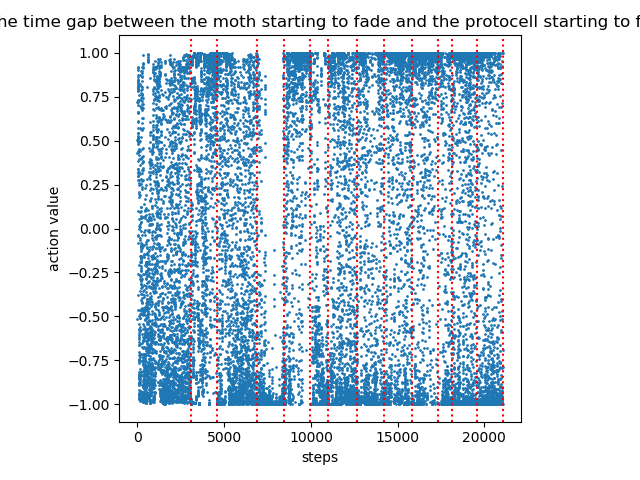

<IPython.core.display.Javascript object>


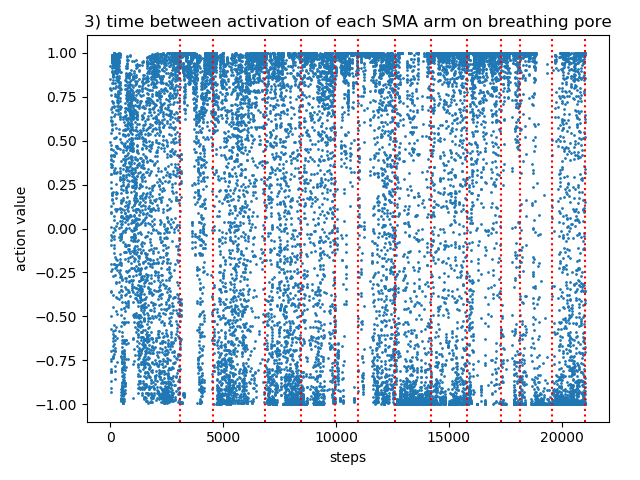

<IPython.core.display.Javascript object>


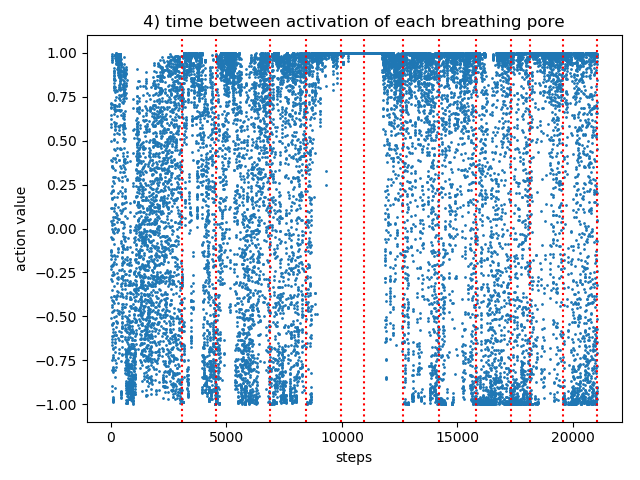

<IPython.core.display.Javascript object>


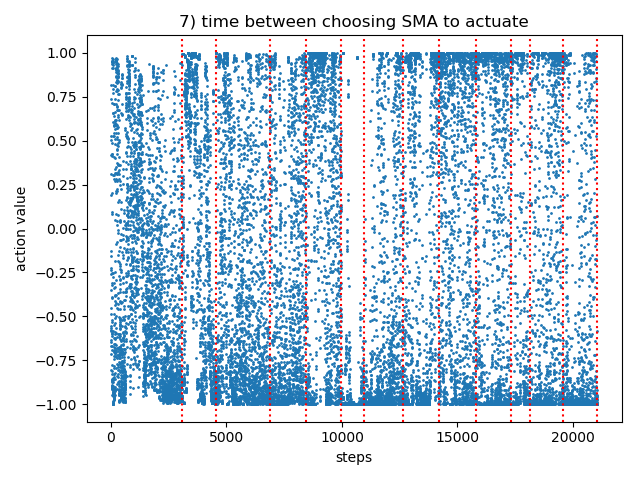

In [70]:
# Convert action into np.array
actions = np.array(interaction_data_all['data'][2].tolist())
# define parameter names:
para_name = ["1.a) (moth)ramp up time: the time it takes for the actuator to fade to its maximum value ",
             "1.a) (RS)ramp up time: the time it takes for the actuator to fade to its maximum value ",
             "1.b)(moth)hold time: the time it that the actuator holds at the maximum value ",
             "1.b) (RS)hold time: the time it that the actuator holds at the maximum value ",
             "1.c) (moth)ramp down time: the time it takes for the actuator to fade to 0 ",
             "1.c) (RS)ramp down time: the time it takes for the actuator to fade to 0 ",
             "1.d) maximum brightness",
             "2) the time gap between the moth starting to fade and the protocell starting to fade",
             "3) time between activation of each SMA arm on breathing pore",
             "4) time between activation of each breathing pore",
             "7) time between choosing SMA to actuate"]

# Plot
num_para = 11
for i in range(num_para):
    plt.figure()
    plt.scatter(np.arange(actions.shape[0]), actions[:,i], s=1)
    for x in interaction_data_all['separate_line']:
        plt.axvline(x, color='r', linestyle=':')
    plt.xlabel('steps')
    plt.ylabel('action value')
    plt.ylim((-1.1, 1.1))
    
    plt.title(para_name[i])
    plt.tight_layout()



# Distribution : 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


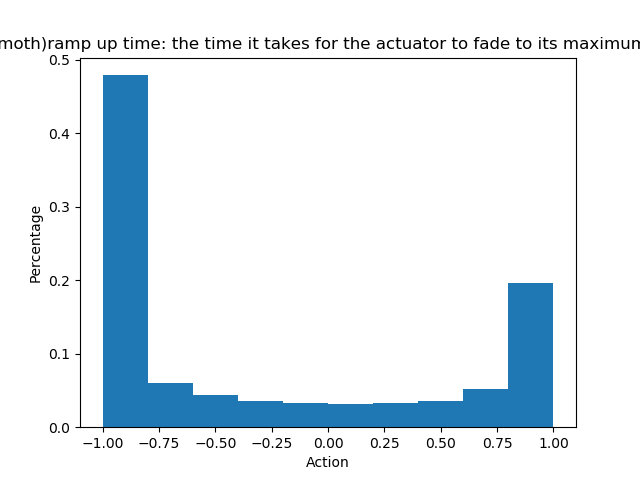

<IPython.core.display.Javascript object>


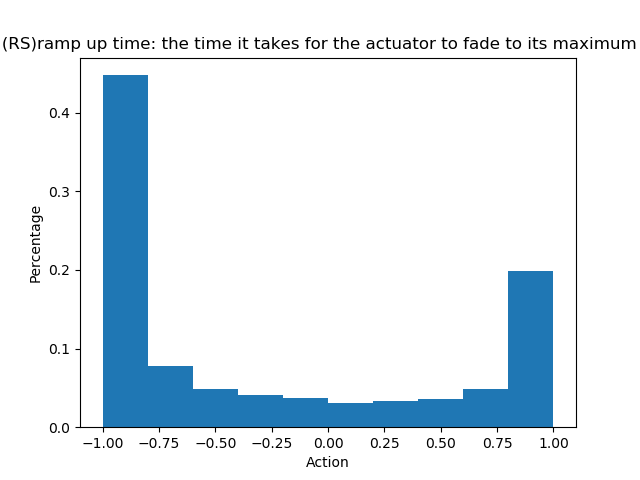

<IPython.core.display.Javascript object>


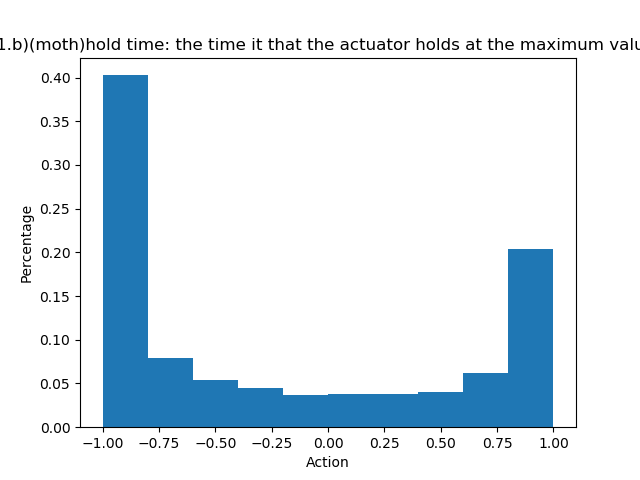

<IPython.core.display.Javascript object>


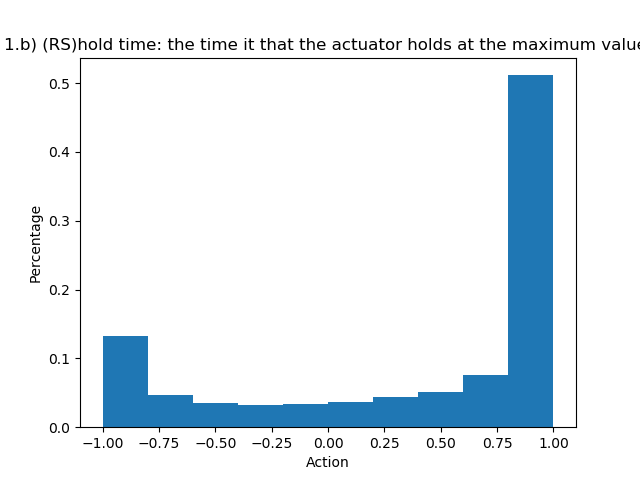

<IPython.core.display.Javascript object>


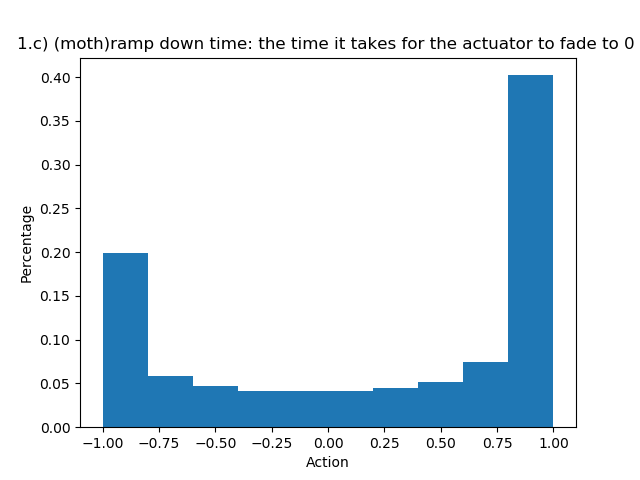

<IPython.core.display.Javascript object>


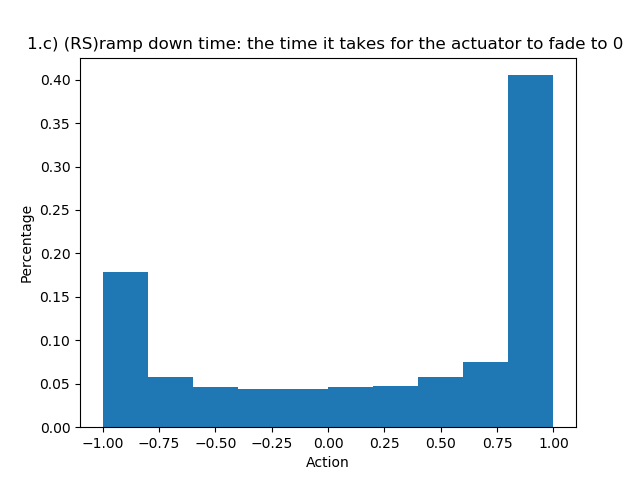

<IPython.core.display.Javascript object>


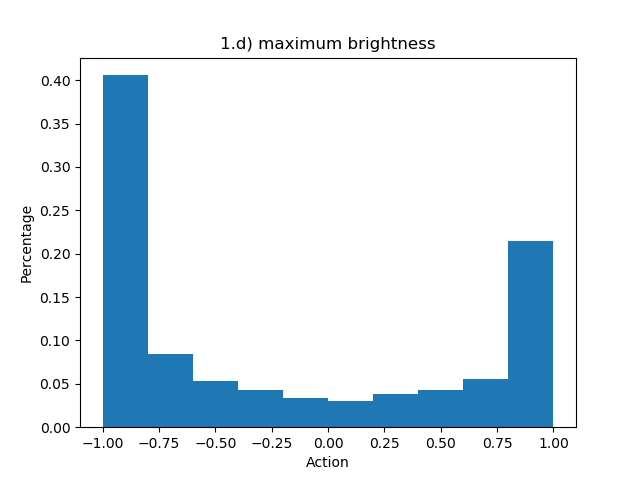

<IPython.core.display.Javascript object>


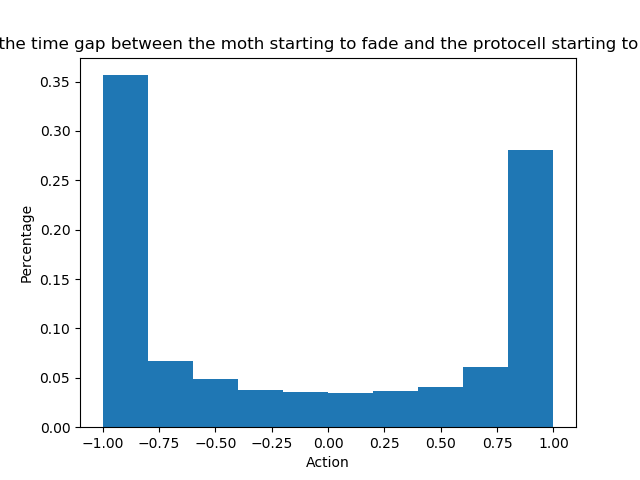

<IPython.core.display.Javascript object>


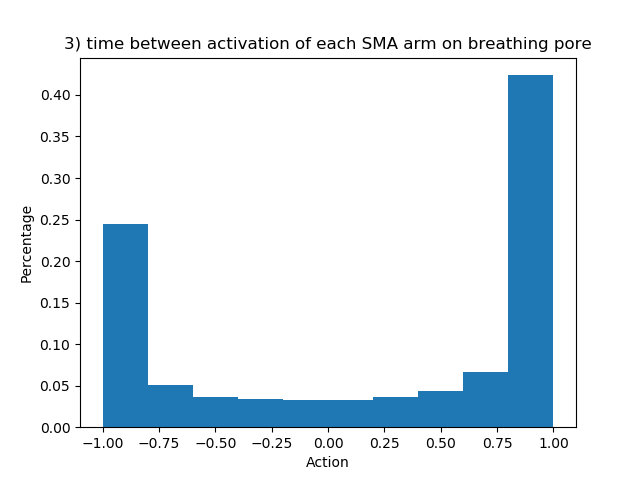

<IPython.core.display.Javascript object>


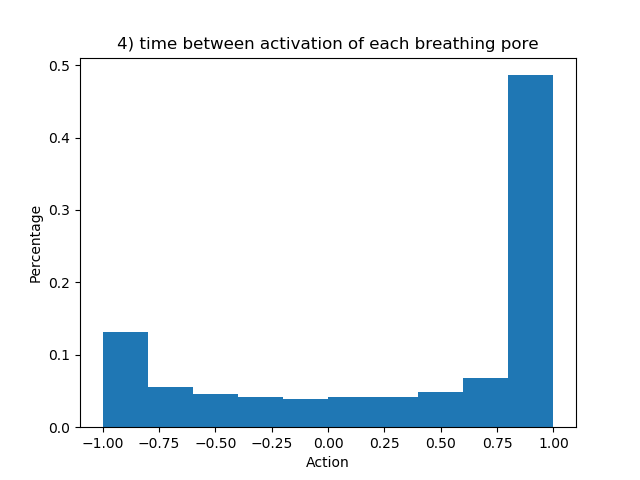

<IPython.core.display.Javascript object>


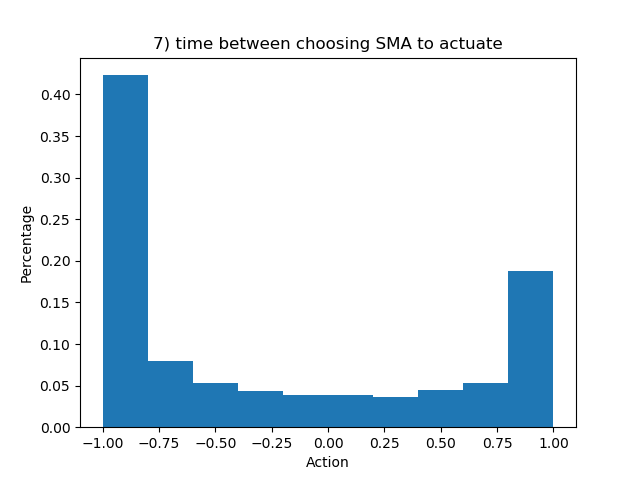

In [71]:
# Define histogram parameters
bin_number = 10
bin_upper_boundary = 1
bin_lower_boundary = -1
bin_width = (bin_upper_boundary - bin_lower_boundary)/bin_number
bins = np.linspace(bin_lower_boundary,bin_upper_boundary,bin_number+1)

def plot_distribution_hist(data, bins, title):
    hist , bin_edges  = np.histogram(data, bins=bins)
    bin_center = np.zeros(len(bin_edges)-1)
    for i in range(1,len(bin_edges)):
        bin_center[i-1] = (bin_edges[i]+bin_edges[i-1])/2
    plt.figure()
    plt.bar(bin_center,hist/hist.sum(), width=bin_width)
    plt.xlabel('Action')
    plt.ylabel('Percentage')
    plt.title(title)

for i in range(num_para):
    plot_distribution_hist(actions[:,i],bins, para_name[i])


# Compare percentages over days/steps

In [72]:
# Separate actions into days
days = len(logs)
actions_per_day = {}
separation_boundaries = [0] + interaction_data_all['separate_line']
for d in range(days):
    actions_per_day[d] = actions[separation_boundaries[d]:separation_boundaries[d+1]]

# Compare over different days for all parameters

bin_number = 10
bin_upper_boundary = 1
bin_lower_boundary = -1
bin_width = (bin_upper_boundary - bin_lower_boundary)/bin_number
bins = np.linspace(bin_lower_boundary,bin_upper_boundary,bin_number+1)

# Create histogram table that contains histograms of all days
hist_data = []
for i in range(num_para):
    hist_table = pd.DataFrame()
    for d in range(days):
        hist , bin_edges  = np.histogram(actions_per_day[d][:,i], bins=bins)
        hist = hist/hist.sum()
        new_row = pd.DataFrame(np.array([hist]))
        new_row.insert(loc=0,column='day', value=d)
        hist_table = pd.concat([hist_table, new_row], ignore_index=True)
    hist_table
    hist_data.append(hist_table)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


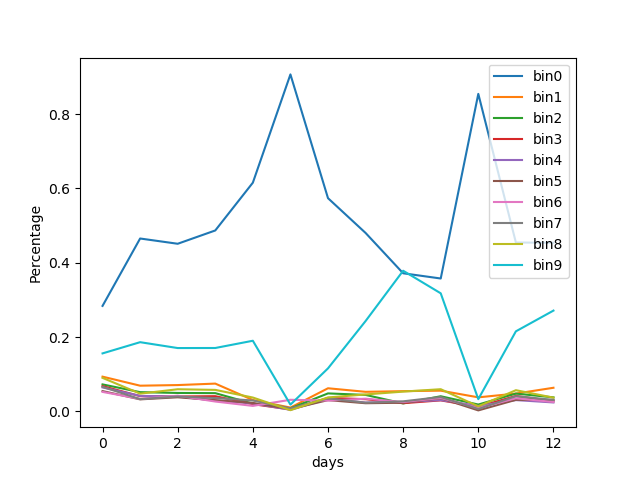

<IPython.core.display.Javascript object>


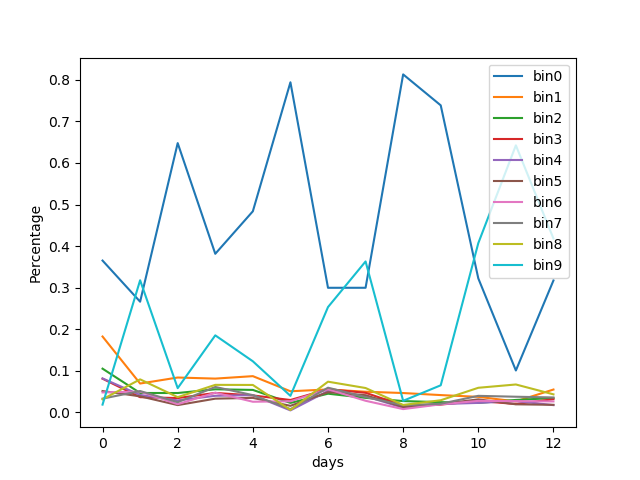

<IPython.core.display.Javascript object>


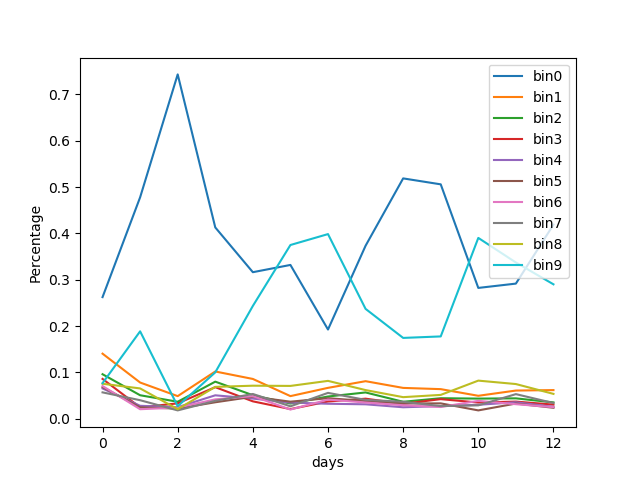

<IPython.core.display.Javascript object>


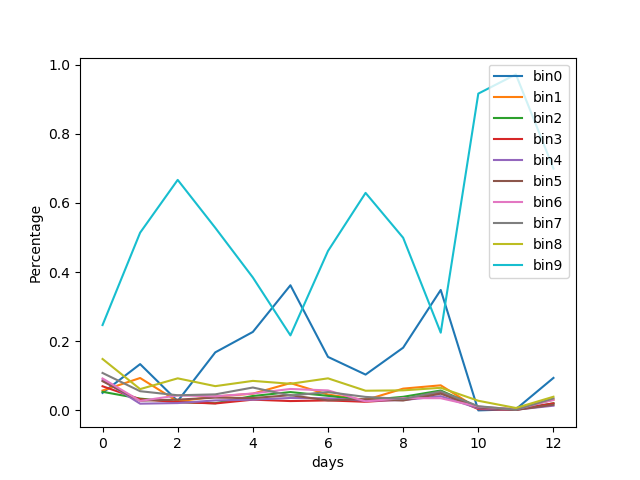

<IPython.core.display.Javascript object>


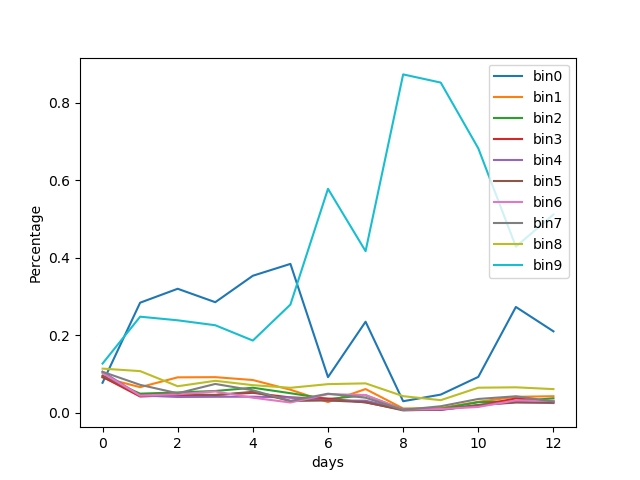

<IPython.core.display.Javascript object>


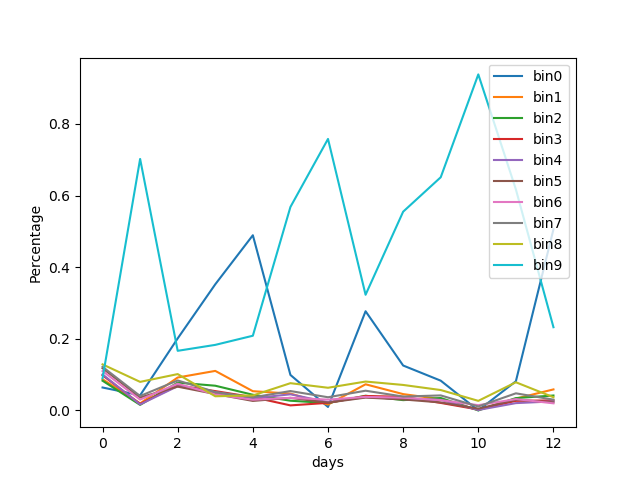

<IPython.core.display.Javascript object>


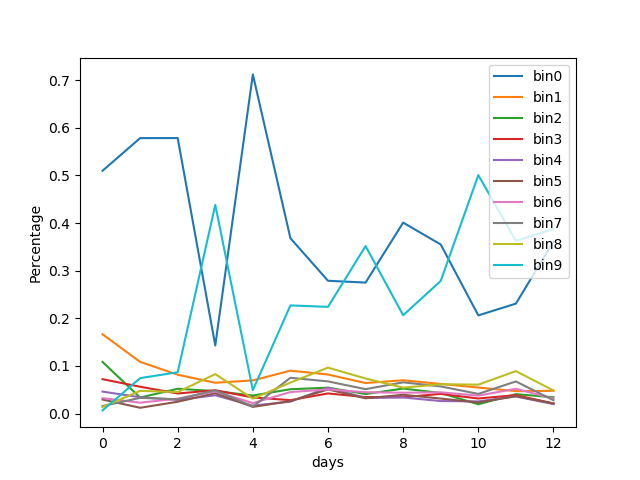

<IPython.core.display.Javascript object>


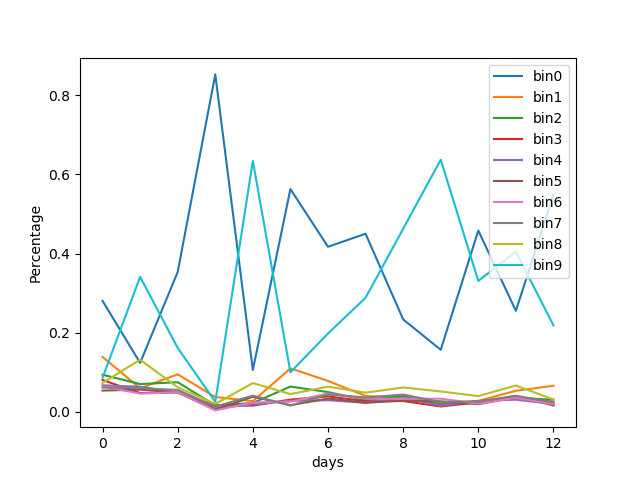

<IPython.core.display.Javascript object>


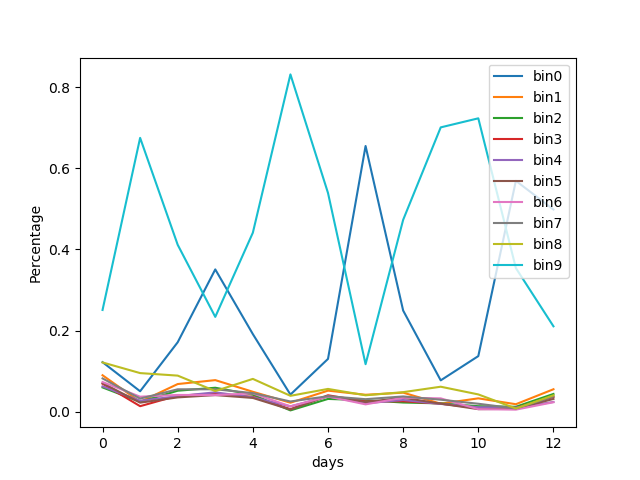

<IPython.core.display.Javascript object>


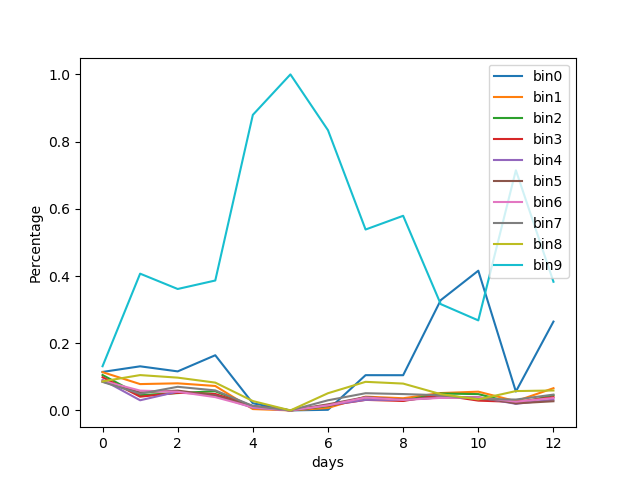

<IPython.core.display.Javascript object>


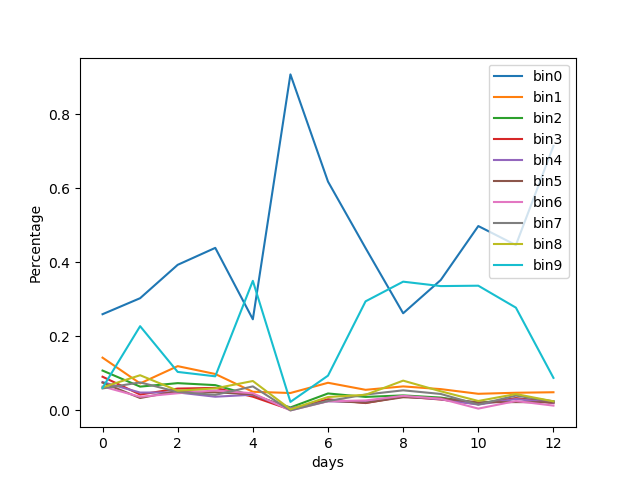

In [73]:
for i in range(num_para):
    # Plot all bins over different days
    plt.figure()
    for b in range(bin_number):
        plt.plot(hist_data[i]["day"],hist_data[i][b], label='bin'+str(b))
    plt.legend(loc='upper right')
    plt.xlabel('days')
    plt.ylabel('Percentage')

In [74]:
import math
# Separate actions into smaller sections 
section_length = 100
num_sections = math.ceil(len(actions)/section_length)
actions_per_section = {}
for s in range(num_sections-1):
    actions_per_section[s] = actions[s*section_length:(s+1)*section_length]
actions_per_section[num_sections-1] = actions[(num_sections-1)*section_length : ]
# Compare over different days for all parameters

bin_number = 10
bin_upper_boundary = 1
bin_lower_boundary = -1
bin_width = (bin_upper_boundary - bin_lower_boundary)/bin_number
bins = np.linspace(bin_lower_boundary,bin_upper_boundary,bin_number+1)

# Create histogram table that contains histograms of all days
hist_data = []
for i in range(num_para):
    hist_table = pd.DataFrame()
    for s in range(num_sections):
#         print(s)
        hist , bin_edges  = np.histogram(actions_per_section[s][:,i], bins=bins)
        hist = hist/hist.sum()
        new_row = pd.DataFrame(np.array([hist]))
        new_row.insert(loc=0,column='section', value=s)
        hist_table = pd.concat([hist_table, new_row], ignore_index=True)
    hist_table
    hist_data.append(hist_table)

In [75]:
len(actions)

21053

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


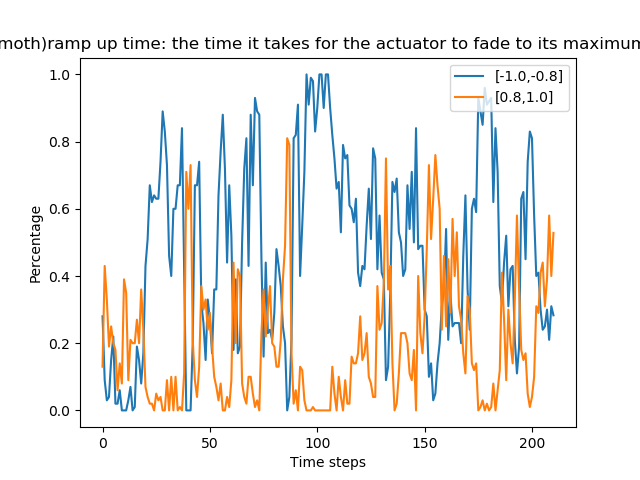

<IPython.core.display.Javascript object>


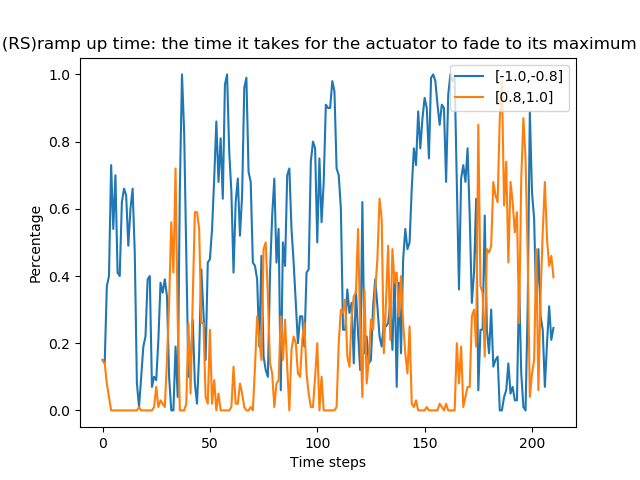

<IPython.core.display.Javascript object>


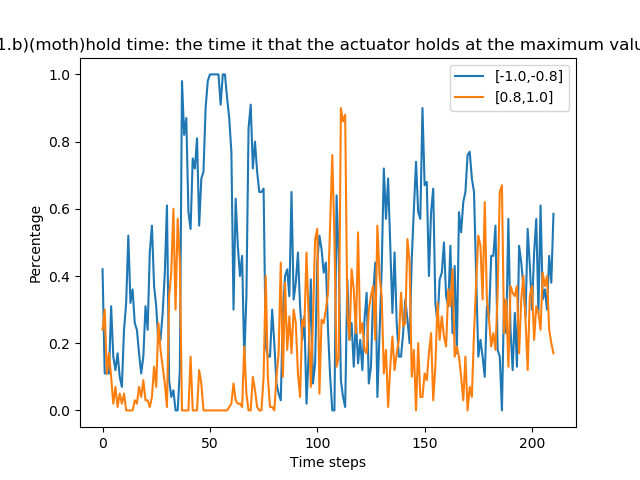

<IPython.core.display.Javascript object>


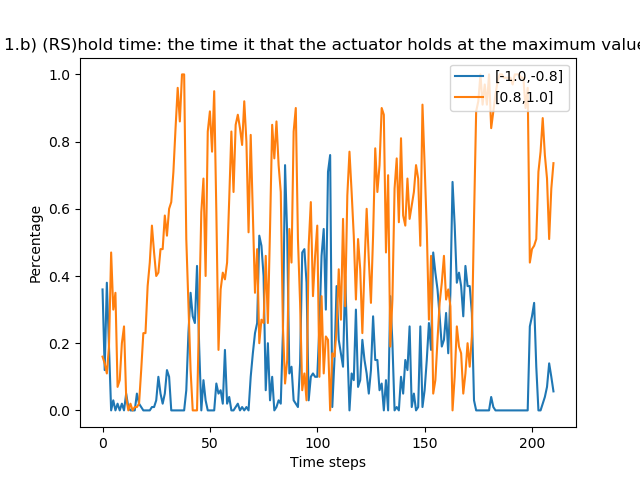

<IPython.core.display.Javascript object>


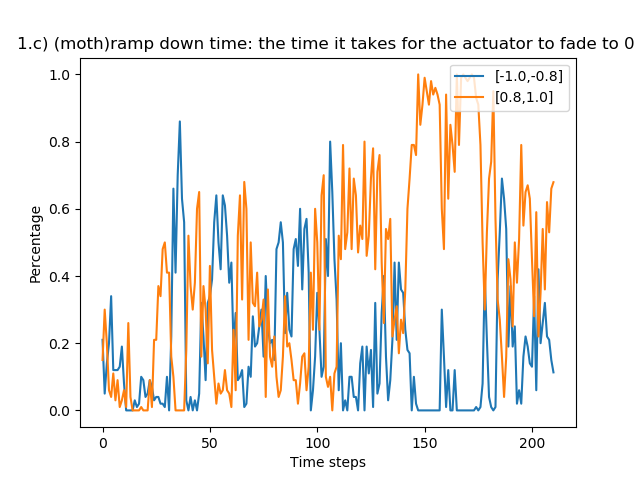

<IPython.core.display.Javascript object>


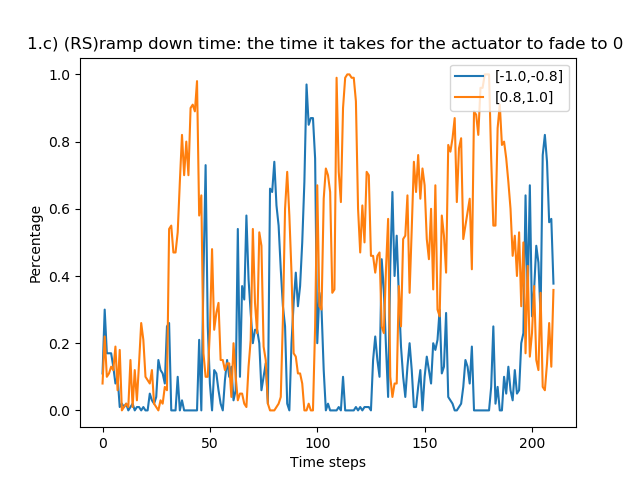

<IPython.core.display.Javascript object>


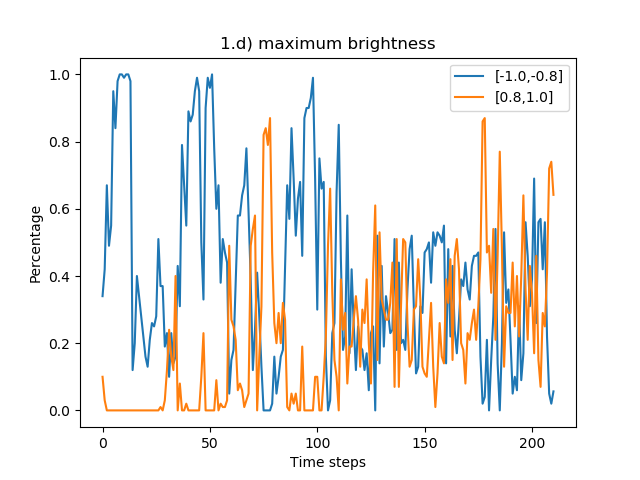

<IPython.core.display.Javascript object>


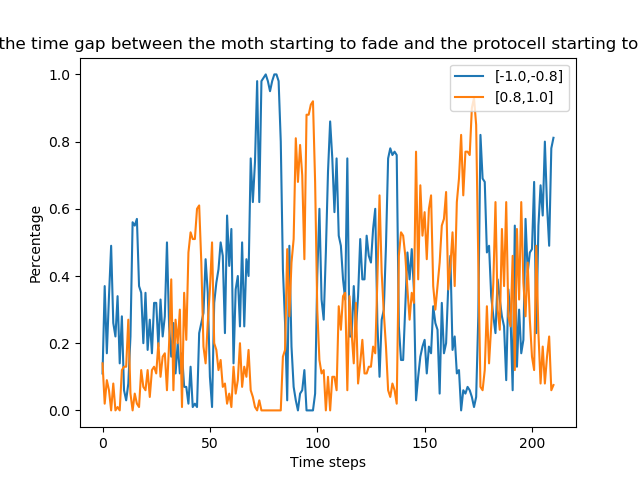

<IPython.core.display.Javascript object>


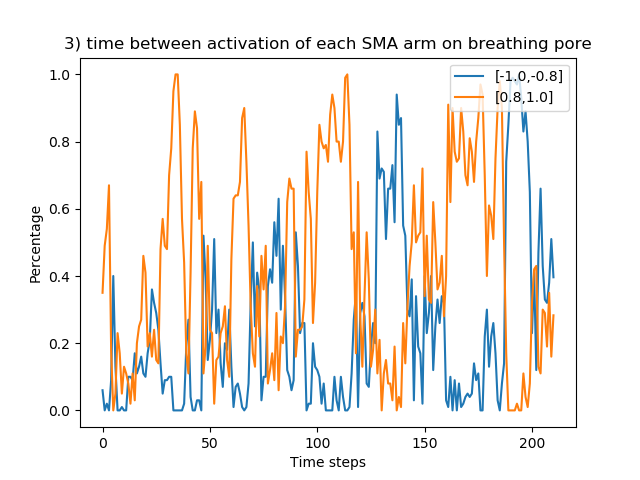

<IPython.core.display.Javascript object>


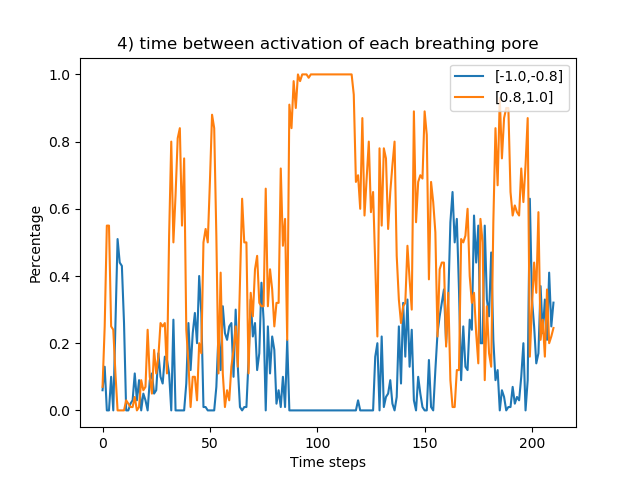

<IPython.core.display.Javascript object>


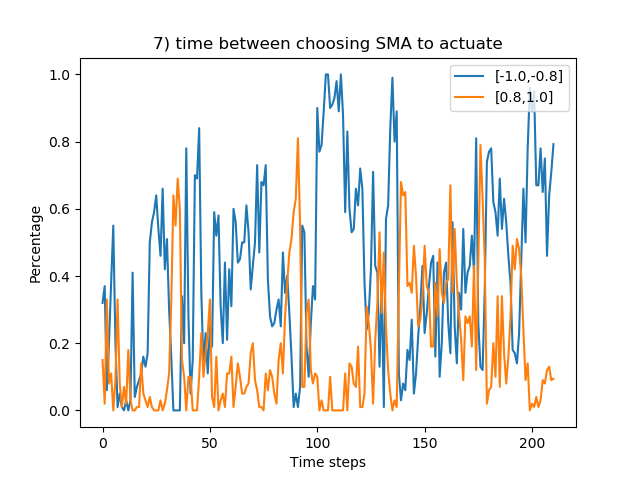

In [77]:
for i in range(num_para):
    # Plot all bins over different days
    plt.figure()
    for b in range(bin_number):
        if b == 0 or b == bin_number-1:
            plt.plot(hist_data[i]["section"],hist_data[i][b], label="[{},{}]".format(bins[b],bins[b+1]))
    plt.legend(loc='upper right')
    plt.xlabel('Time steps')
    plt.ylabel('Percentage')
    plt.title(para_name[i])